In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import stats as stats

from openpyxl import load_workbook
from openpyxl.worksheet.table import Table
# import seaborn as sns


In [2]:
writeOutput = False

In [3]:
os.getcwd()

'/Users/upton6/Documents/notebooks/Nanostring/Larisa_Spheroids/Git'

In [4]:
# read in paths from config file

configDict = {
    'initialDataPath' : '',
    'QCDataPath' : '',
    'labWorksheet01Path':''
}

with open('./config.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('#'):
            line = line.strip()
            fields = line.split(':')

            if fields[0].strip()=='initialDataPath':
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
            else:
                configDict[fields[0].strip()] = fields[1].strip().strip('\'')
## ToDo: Add checks to ensure that minimal fields have been populated. Raise errors or warnings

# Load in initial dataset to grab positive and negative control probe values that are needed for Nanostring Normalisation in R

In [5]:
# ## Not yet working

# # dataPath = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/DSP_Protein_Data'
# # dataPath = '../../../Nanostring/projects/NS_Liver_HCC_DSP/DSP_Protein_Data'
# # dataFile = 'Initial Dataset.xlsx'

# # initialWB = load_workbook(os.path.join(dataPath,dataFile))
# initialWB = load_workbook(configDict['initialDataPath'])

# print(initialWB.sheetnames)

In [6]:
# initialWS = initialWB['Exported dataset']
# initialSegments = [[y.value for y in x] for x in initialWS[initialWS.calculate_dimension()]]
# initialData = pd.DataFrame(initialSegments)


ToDo: need to infer location of data starting cell

In [7]:
# col3 = initialData.iloc[:,3].tolist()
# targIdx = col3.index('Target name (display name)') + 1
# print('targIdx')
# print(targIdx)


In [8]:
# initialValues = initialData.iloc[targIdx:,4:]

# initialValues

In [9]:
# initialPatients = initialData.iloc[0,4:]

# # initialPatients = [x.replace(' | ', '_|_') for x in initialPatients.values]
# initialPatients = [x.replace(' | ', '_') for x in initialPatients.values]

# initialPatients

In [10]:
# initialTargetNames = initialData.iloc[targIdx:,3].values
# initialTargetNames


In [11]:
# initialTargetClass = initialData.iloc[targIdx:,2]
# initialTargetClass.index = initialTargetNames
# initialTargetClass.rename('Code.Class', inplace=True)
# initialTargetClass

In [12]:
# initialIndex = pd.MultiIndex.from_tuples(zip(initialTargetNames,initialTargetClass),names=['Name', 'Code.Class'])

In [13]:
# initialValues.index = initialIndex
# initialValues.columns = initialPatients

# initialValues


In [14]:
# initialValues.reset_index(level='Code.Class', inplace=True)

In [15]:
# initialValues

In [16]:
# initialValues.loc['HYB-NEG']

# Load in QC dataset to grab ERCC corrected probe values for Nanostring Norm in R

In [17]:
# # dataPath = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/DSP_Protein_Data'
# # dataPath = '../../../Nanostring/projects/NS_Liver_HCC_DSP/DSP_Protein_Data'
# # dataFile = 'Default_QC.xlsx'

# QCwb = load_workbook(configDict['QCDataPath'])

# print(QCwb.sheetnames)


In [18]:
# QCws = QCwb['Exported dataset']
# segments = [[y.value for y in x] for x in QCws[QCws.calculate_dimension()]]
# QCData = pd.DataFrame(segments)


In [19]:
# QCValues = QCData.iloc[targIdx:,4:]

# QCValues

In [20]:
# patients = QCData.iloc[0,4:]

# # patients = [x.replace(' | ', '_|_') for x in patients.values]
# patients = [x.replace(' | ', '_') for x in patients.values]

# patients

In [21]:
# targetNames = QCData.iloc[targIdx:,3].values
# targetNames


In [22]:
# targetClass = QCData.iloc[targIdx:,2]
# targetClass.index = targetNames
# targetClass.rename('Code.Class', inplace=True)
# targetClass

In [23]:
# index = pd.MultiIndex.from_tuples(zip(targetNames,targetClass),names=['Name', 'Code.Class'])

In [24]:
# QCValues.index = index
# QCValues.columns = patients

# QCValues


In [25]:
# QCValues.sort_values(by=['Code.Class','Name'])

In [26]:
# QCValues.reset_index(level='Code.Class', inplace=True)

In [27]:
# ERCCPosValue = np.exp2(np.mean([np.log2(float(x)) for x in initialValues.loc['HYB-POS'].values[1:]]))

In [28]:
# ERCCPos = ['Positive']
# ERCCPos.extend([ERCCPosValue for x in range(len(initialValues.loc['HYB-POS'])-1)])

In [29]:
# QCValues.loc['HYB-NEG'] = initialValues.loc['HYB-NEG']
# # QCValues.loc['HYB-POS'] = initialValues.loc['HYB-POS'] ## ToDo: This should be mean value to align with ercc correction
# QCValues.loc['HYB-POS'] = ERCCPos ## ToDo: This should be mean value to align with ercc correction


In [30]:
# QCValues

In [31]:
# basePath = configDict['initialDataPath'][:configDict['initialDataPath'].rfind('/')]

In [32]:
# normDir = os.path.join(basePath, 'Normalisation')

# # check if folder exists and create directory if not
# if not (os.path.isdir(normDir)):
#     os.mkdir(normDir)


# Export files to csv for RUV/Nanostring Norm analysis in R

In [33]:
# # exportPath = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation'
# # exportPath = '../../../Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation'

# # ToDo: Ask for project name interactively

# project = 'Larisa_Spheroids'

# # InitialCSV = 'initial_' + project + '_RUV.csv'
# qcCSV = 'QC_' + project + '_RUV.csv'

# writeOutput = True
# if writeOutput:
#     # initialValues.to_csv(os.path.join(exportPath,InitialCSV))
#     QCValues.to_csv(os.path.join(normDir,qcCSV))
# writeOutput= False

In [34]:
# break

# Visualise Nanostring Norm results and choose samples to be kept for final normalisation

In [35]:
normPath = '../../../Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/RUVIII_NSNorm_Grouped'
normPath = '/Users/upton6/Documents/Nanostring/projects/Larisa/2312_Run/DSP_Protein_Data/Normalisation/NSNorm/'
files = os.listdir(normPath)
files = sorted(files)
print(len(files))
print(files)



84
['NanoStringNorm_01_none_none_none.csv', 'NanoStringNorm_02_sum_none_none.csv', 'NanoStringNorm_03_geo.mean_none_none.csv', 'NanoStringNorm_04_none_mean_none.csv', 'NanoStringNorm_05_sum_mean_none.csv', 'NanoStringNorm_06_geo.mean_mean_none.csv', 'NanoStringNorm_07_none_mean.2sd_none.csv', 'NanoStringNorm_08_sum_mean.2sd_none.csv', 'NanoStringNorm_09_geo.mean_mean.2sd_none.csv', 'NanoStringNorm_10_none_max_none.csv', 'NanoStringNorm_11_sum_max_none.csv', 'NanoStringNorm_12_geo.mean_max_none.csv', 'NanoStringNorm_13_none_none_housekeeping.sum.csv', 'NanoStringNorm_14_sum_none_housekeeping.sum.csv', 'NanoStringNorm_15_geo.mean_none_housekeeping.sum.csv', 'NanoStringNorm_16_none_mean_housekeeping.sum.csv', 'NanoStringNorm_17_sum_mean_housekeeping.sum.csv', 'NanoStringNorm_18_geo.mean_mean_housekeeping.sum.csv', 'NanoStringNorm_19_none_mean.2sd_housekeeping.sum.csv', 'NanoStringNorm_20_sum_mean.2sd_housekeeping.sum.csv', 'NanoStringNorm_21_geo.mean_mean.2sd_housekeeping.sum.csv', 'NanoS

In [36]:
fileIdx = 0
tempFile = os.path.join(normPath,files[fileIdx])

print(tempFile)
tempDF = pd.read_csv(os.path.join(normPath,files[fileIdx]), index_col=0)


/Users/upton6/Documents/Nanostring/projects/Larisa/2312_Run/DSP_Protein_Data/Normalisation/NSNorm/NanoStringNorm_01_none_none_none.csv


In [37]:
tempDF

,GRC.Series.B.IP_Syndecan.1_001_Segment.1,GRC.Series.B.IP_Syndecan.1_002_Segment.1,GRC.Series.B.IP_Syndecan.1_003_Segment.1,GRC.Series.B.IP_Syndecan.1_004_Segment.1,GRC.Series.B.IP_Syndecan.1_005_Segment.1,GRC.Series.B.IP_Syndecan.1_006_Segment.1,GRC.Series.B.IP_Syndecan.1_007_Segment.1,GRC.Series.B.IP_Syndecan.1_008_Segment.1,GRC.Series.B.IP_Syndecan.1_009_Segment.1,GRC.Series.B.IP_Syndecan.1_010_Segment.1,...,GRC.Series.A.IP_Syndecan.1_241_Segment.1,GRC.Series.A.IP_Syndecan.1_242_Segment.1,GRC.Series.A.IP_Syndecan.1_243_Segment.1,GRC.Series.A.IP_Syndecan.1_251_Segment.1,GRC.Series.A.IP_Syndecan.1_252_Segment.1,GRC.Series.A.IP_Syndecan.1_253_Segment.1,GRC.Series.A.IP_Syndecan.1_261_Segment.1,GRC.Series.A.IP_Syndecan.1_262_Segment.1,GRC.Series.A.IP_Syndecan.1_263_Segment.1,GRC.Series.A.IP_Syndecan.1_264_Segment.1
Syndecan-1,4.889327,1.274905,2.959077,4.390144,0.893649,6.798060,3.342662,4.410558,1.830722,13.924870,...,8.217399,11.290662,6.708057,5.234493,6.165833,14.794916,5.138328,10.216754,5.535910,4.800059
CD31,5.634713,8.227892,3.637540,3.035657,4.943458,15.042117,7.704512,24.398182,3.375710,4.814322,...,9.870953,19.673274,13.388498,16.251567,16.408376,25.518821,9.970627,16.183687,2.041558,2.212734
Olig2,15.954560,6.240292,8.046571,3.581414,5.103178,33.274541,14.997915,32.382608,10.454331,8.519777,...,24.422114,19.174772,19.493319,15.211206,22.804269,28.227972,47.510131,28.918282,7.225781,10.442179
Neurofilament light,6.628479,5.761312,1.782948,0.991956,2.423046,25.805239,4.531659,7.972547,3.309222,4.719500,...,8.882922,4.023655,9.370961,4.178534,13.535484,9.841937,14.099830,4.369135,6.004044,5.784408
IBA1,8.226115,1.225704,1.896587,1.055180,6.873288,20.914268,6.427322,4.240345,1.582399,10.040610,...,8.681537,6.816220,13.465193,9.954268,18.239462,22.577485,14.928520,7.709871,2.128907,3.076543
NeuN,3.914273,5.443504,3.158618,8.200825,0.953910,23.220723,10.704205,14.123929,5.862521,3.715967,...,20.346149,10.543216,21.525319,8.709470,19.052597,21.490757,16.793592,19.080802,1.181843,6.831657
HLA-DR,10.671812,4.174056,3.229353,3.593347,5.851635,35.611100,3.647972,31.287150,1.582399,7.598367,...,22.274238,10.656988,12.273516,18.090612,18.802377,25.064611,23.503584,7.417962,10.874785,6.111566
CD163,309.160821,94.348840,143.218262,65.800680,117.199713,168.120461,93.938860,167.332449,104.612567,376.655891,...,4.100358,11.589674,4.016663,5.014911,13.291160,15.749203,12.306951,19.226764,240.623835,277.286486
TMEM119,20.509974,5.093363,5.516833,3.507806,9.282543,72.785785,37.391870,28.192933,8.776683,31.987901,...,29.685672,26.220826,22.617575,13.867192,31.184034,39.590521,24.749879,24.605611,11.500564,12.145229
GFAP,38.858786,17.225306,7.055337,4.361431,31.960942,317.689249,187.293064,247.128485,43.649958,31.817728,...,484.930338,224.057051,93.578948,53.219703,185.150493,167.135157,121.492991,75.921878,28.158479,18.438837


### Sort samples and probes 

In [38]:
tempDF1 = pd.read_csv(os.path.join(normPath,files[0]), index_col=0)
probeOrder = tempDF1.mean(axis=1).sort_values().index

sampleOrder = sorted(tempDF1.columns)

In [39]:
sampleOrder

['GRC.Series.A.IP_Syndecan.1_001_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_002_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_003_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_004_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_005_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_006_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_007_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_008_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_009_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_010_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_012_Full.ROI',
 'GRC.Series.A.IP_Syndecan.1_013_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_014_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_015_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_016_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_017_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_018_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_019_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_020_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_021_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_022_Segment.1',
 'GRC.Series.A.IP_Syndecan.1_023_Segment.1',
 'GRC.Serie

In [40]:
tempDF1

,GRC.Series.B.IP_Syndecan.1_001_Segment.1,GRC.Series.B.IP_Syndecan.1_002_Segment.1,GRC.Series.B.IP_Syndecan.1_003_Segment.1,GRC.Series.B.IP_Syndecan.1_004_Segment.1,GRC.Series.B.IP_Syndecan.1_005_Segment.1,GRC.Series.B.IP_Syndecan.1_006_Segment.1,GRC.Series.B.IP_Syndecan.1_007_Segment.1,GRC.Series.B.IP_Syndecan.1_008_Segment.1,GRC.Series.B.IP_Syndecan.1_009_Segment.1,GRC.Series.B.IP_Syndecan.1_010_Segment.1,...,GRC.Series.A.IP_Syndecan.1_241_Segment.1,GRC.Series.A.IP_Syndecan.1_242_Segment.1,GRC.Series.A.IP_Syndecan.1_243_Segment.1,GRC.Series.A.IP_Syndecan.1_251_Segment.1,GRC.Series.A.IP_Syndecan.1_252_Segment.1,GRC.Series.A.IP_Syndecan.1_253_Segment.1,GRC.Series.A.IP_Syndecan.1_261_Segment.1,GRC.Series.A.IP_Syndecan.1_262_Segment.1,GRC.Series.A.IP_Syndecan.1_263_Segment.1,GRC.Series.A.IP_Syndecan.1_264_Segment.1
Syndecan-1,4.889327,1.274905,2.959077,4.390144,0.893649,6.798060,3.342662,4.410558,1.830722,13.924870,...,8.217399,11.290662,6.708057,5.234493,6.165833,14.794916,5.138328,10.216754,5.535910,4.800059
CD31,5.634713,8.227892,3.637540,3.035657,4.943458,15.042117,7.704512,24.398182,3.375710,4.814322,...,9.870953,19.673274,13.388498,16.251567,16.408376,25.518821,9.970627,16.183687,2.041558,2.212734
Olig2,15.954560,6.240292,8.046571,3.581414,5.103178,33.274541,14.997915,32.382608,10.454331,8.519777,...,24.422114,19.174772,19.493319,15.211206,22.804269,28.227972,47.510131,28.918282,7.225781,10.442179
Neurofilament light,6.628479,5.761312,1.782948,0.991956,2.423046,25.805239,4.531659,7.972547,3.309222,4.719500,...,8.882922,4.023655,9.370961,4.178534,13.535484,9.841937,14.099830,4.369135,6.004044,5.784408
IBA1,8.226115,1.225704,1.896587,1.055180,6.873288,20.914268,6.427322,4.240345,1.582399,10.040610,...,8.681537,6.816220,13.465193,9.954268,18.239462,22.577485,14.928520,7.709871,2.128907,3.076543
NeuN,3.914273,5.443504,3.158618,8.200825,0.953910,23.220723,10.704205,14.123929,5.862521,3.715967,...,20.346149,10.543216,21.525319,8.709470,19.052597,21.490757,16.793592,19.080802,1.181843,6.831657
HLA-DR,10.671812,4.174056,3.229353,3.593347,5.851635,35.611100,3.647972,31.287150,1.582399,7.598367,...,22.274238,10.656988,12.273516,18.090612,18.802377,25.064611,23.503584,7.417962,10.874785,6.111566
CD163,309.160821,94.348840,143.218262,65.800680,117.199713,168.120461,93.938860,167.332449,104.612567,376.655891,...,4.100358,11.589674,4.016663,5.014911,13.291160,15.749203,12.306951,19.226764,240.623835,277.286486
TMEM119,20.509974,5.093363,5.516833,3.507806,9.282543,72.785785,37.391870,28.192933,8.776683,31.987901,...,29.685672,26.220826,22.617575,13.867192,31.184034,39.590521,24.749879,24.605611,11.500564,12.145229
GFAP,38.858786,17.225306,7.055337,4.361431,31.960942,317.689249,187.293064,247.128485,43.649958,31.817728,...,484.930338,224.057051,93.578948,53.219703,185.150493,167.135157,121.492991,75.921878,28.158479,18.438837


In [41]:
tempDF1.loc[probeOrder,sampleOrder]

,GRC.Series.A.IP_Syndecan.1_001_Segment.1,GRC.Series.A.IP_Syndecan.1_002_Segment.1,GRC.Series.A.IP_Syndecan.1_003_Segment.1,GRC.Series.A.IP_Syndecan.1_004_Segment.1,GRC.Series.A.IP_Syndecan.1_005_Segment.1,GRC.Series.A.IP_Syndecan.1_006_Segment.1,GRC.Series.A.IP_Syndecan.1_007_Segment.1,GRC.Series.A.IP_Syndecan.1_008_Segment.1,GRC.Series.A.IP_Syndecan.1_009_Segment.1,GRC.Series.A.IP_Syndecan.1_010_Segment.1,...,GRC.Series.B.IP_Syndecan.1_037_Segment.1,GRC.Series.B.IP_Syndecan.1_038_Segment.1,GRC.Series.B.IP_Syndecan.1_039_Segment.1,GRC.Series.B.IP_Syndecan.1_040_Segment.1,GRC.Series.B.IP_Syndecan.1_041_Segment.1,GRC.Series.B.IP_Syndecan.1_042_Segment.1,GRC.Series.B.IP_Syndecan.1_043_Segment.1,GRC.Series.B.IP_Syndecan.1_044_Segment.1,GRC.Series.B.IP_Syndecan.1_045_Segment.1,GRC.Series.B.IP_Syndecan.1_046_Segment.1
CD40,0.975189,0.420024,0.711104,0.753748,1.846018,0.912714,2.303478,2.386530,1.233773,2.599026,...,5.270795,6.110342,3.806416,6.519074,5.607894,3.641430,1.464997,4.955179,2.290699,7.347524
P2ry12,0.698944,0.686921,0.581481,0.616351,1.509517,1.308332,2.354487,0.907600,0.884277,1.062632,...,6.599922,8.501306,2.965681,3.174491,4.096182,2.659814,5.203705,3.217261,2.230931,1.788954
CD39,0.820791,0.403336,1.365701,0.859954,4.136232,1.536413,3.317933,1.527805,2.076867,1.482618,...,3.744894,2.604835,3.028989,2.431692,2.789082,3.622125,5.314788,8.214848,2.278554,5.481428
Synaptophysin,0.975189,3.296744,0.930235,2.958060,8.049595,2.093029,1.506654,4.162604,1.414640,6.799861,...,11.486065,13.315596,6.967720,3.729154,9.623775,6.943446,6.112923,5.039196,1.747154,5.604078
Myelin basic protein,3.753968,2.305871,1.561542,0.827593,2.702495,5.270204,3.161436,1.746892,1.187345,4.280478,...,8.600650,7.754899,2.898532,1.034205,2.668958,3.466122,10.171766,6.288832,1.453612,2.014574
Neurofilament light,2.239708,2.201181,0.811301,0.859954,6.449497,4.192442,1.508952,5.211191,1.416797,1.482618,...,9.813978,12.411464,6.314204,4.827699,10.797606,7.550649,9.496423,13.699680,1.357101,2.014574
Syndecan-1,0.975189,2.742996,2.321956,2.461200,4.018512,1.306100,5.641129,1.298782,1.233773,1.482618,...,10.540548,12.219474,5.328455,9.506041,8.177370,10.619785,6.233017,17.341410,1.256146,2.014574
CD68,0.770529,1.893187,1.923107,1.358955,5.547067,6.490486,5.191262,3.585623,4.874221,1.171465,...,12.885308,10.954324,6.079526,10.226193,3.998575,15.578606,9.143473,18.843584,1.306662,2.095591
CD31,0.994948,3.422418,1.655479,3.509511,5.730137,4.656035,4.021941,6.481927,7.552627,1.512659,...,23.100401,24.269280,7.298569,14.843657,16.801237,18.328320,16.648276,28.503751,1.098068,3.522106
IBA1,0.806928,0.396524,3.356587,0.711575,4.647284,7.552321,2.174596,1.502001,3.062685,2.453608,...,43.145019,29.176743,4.846813,7.782107,21.198907,20.285700,19.134938,18.402896,1.256146,8.771065


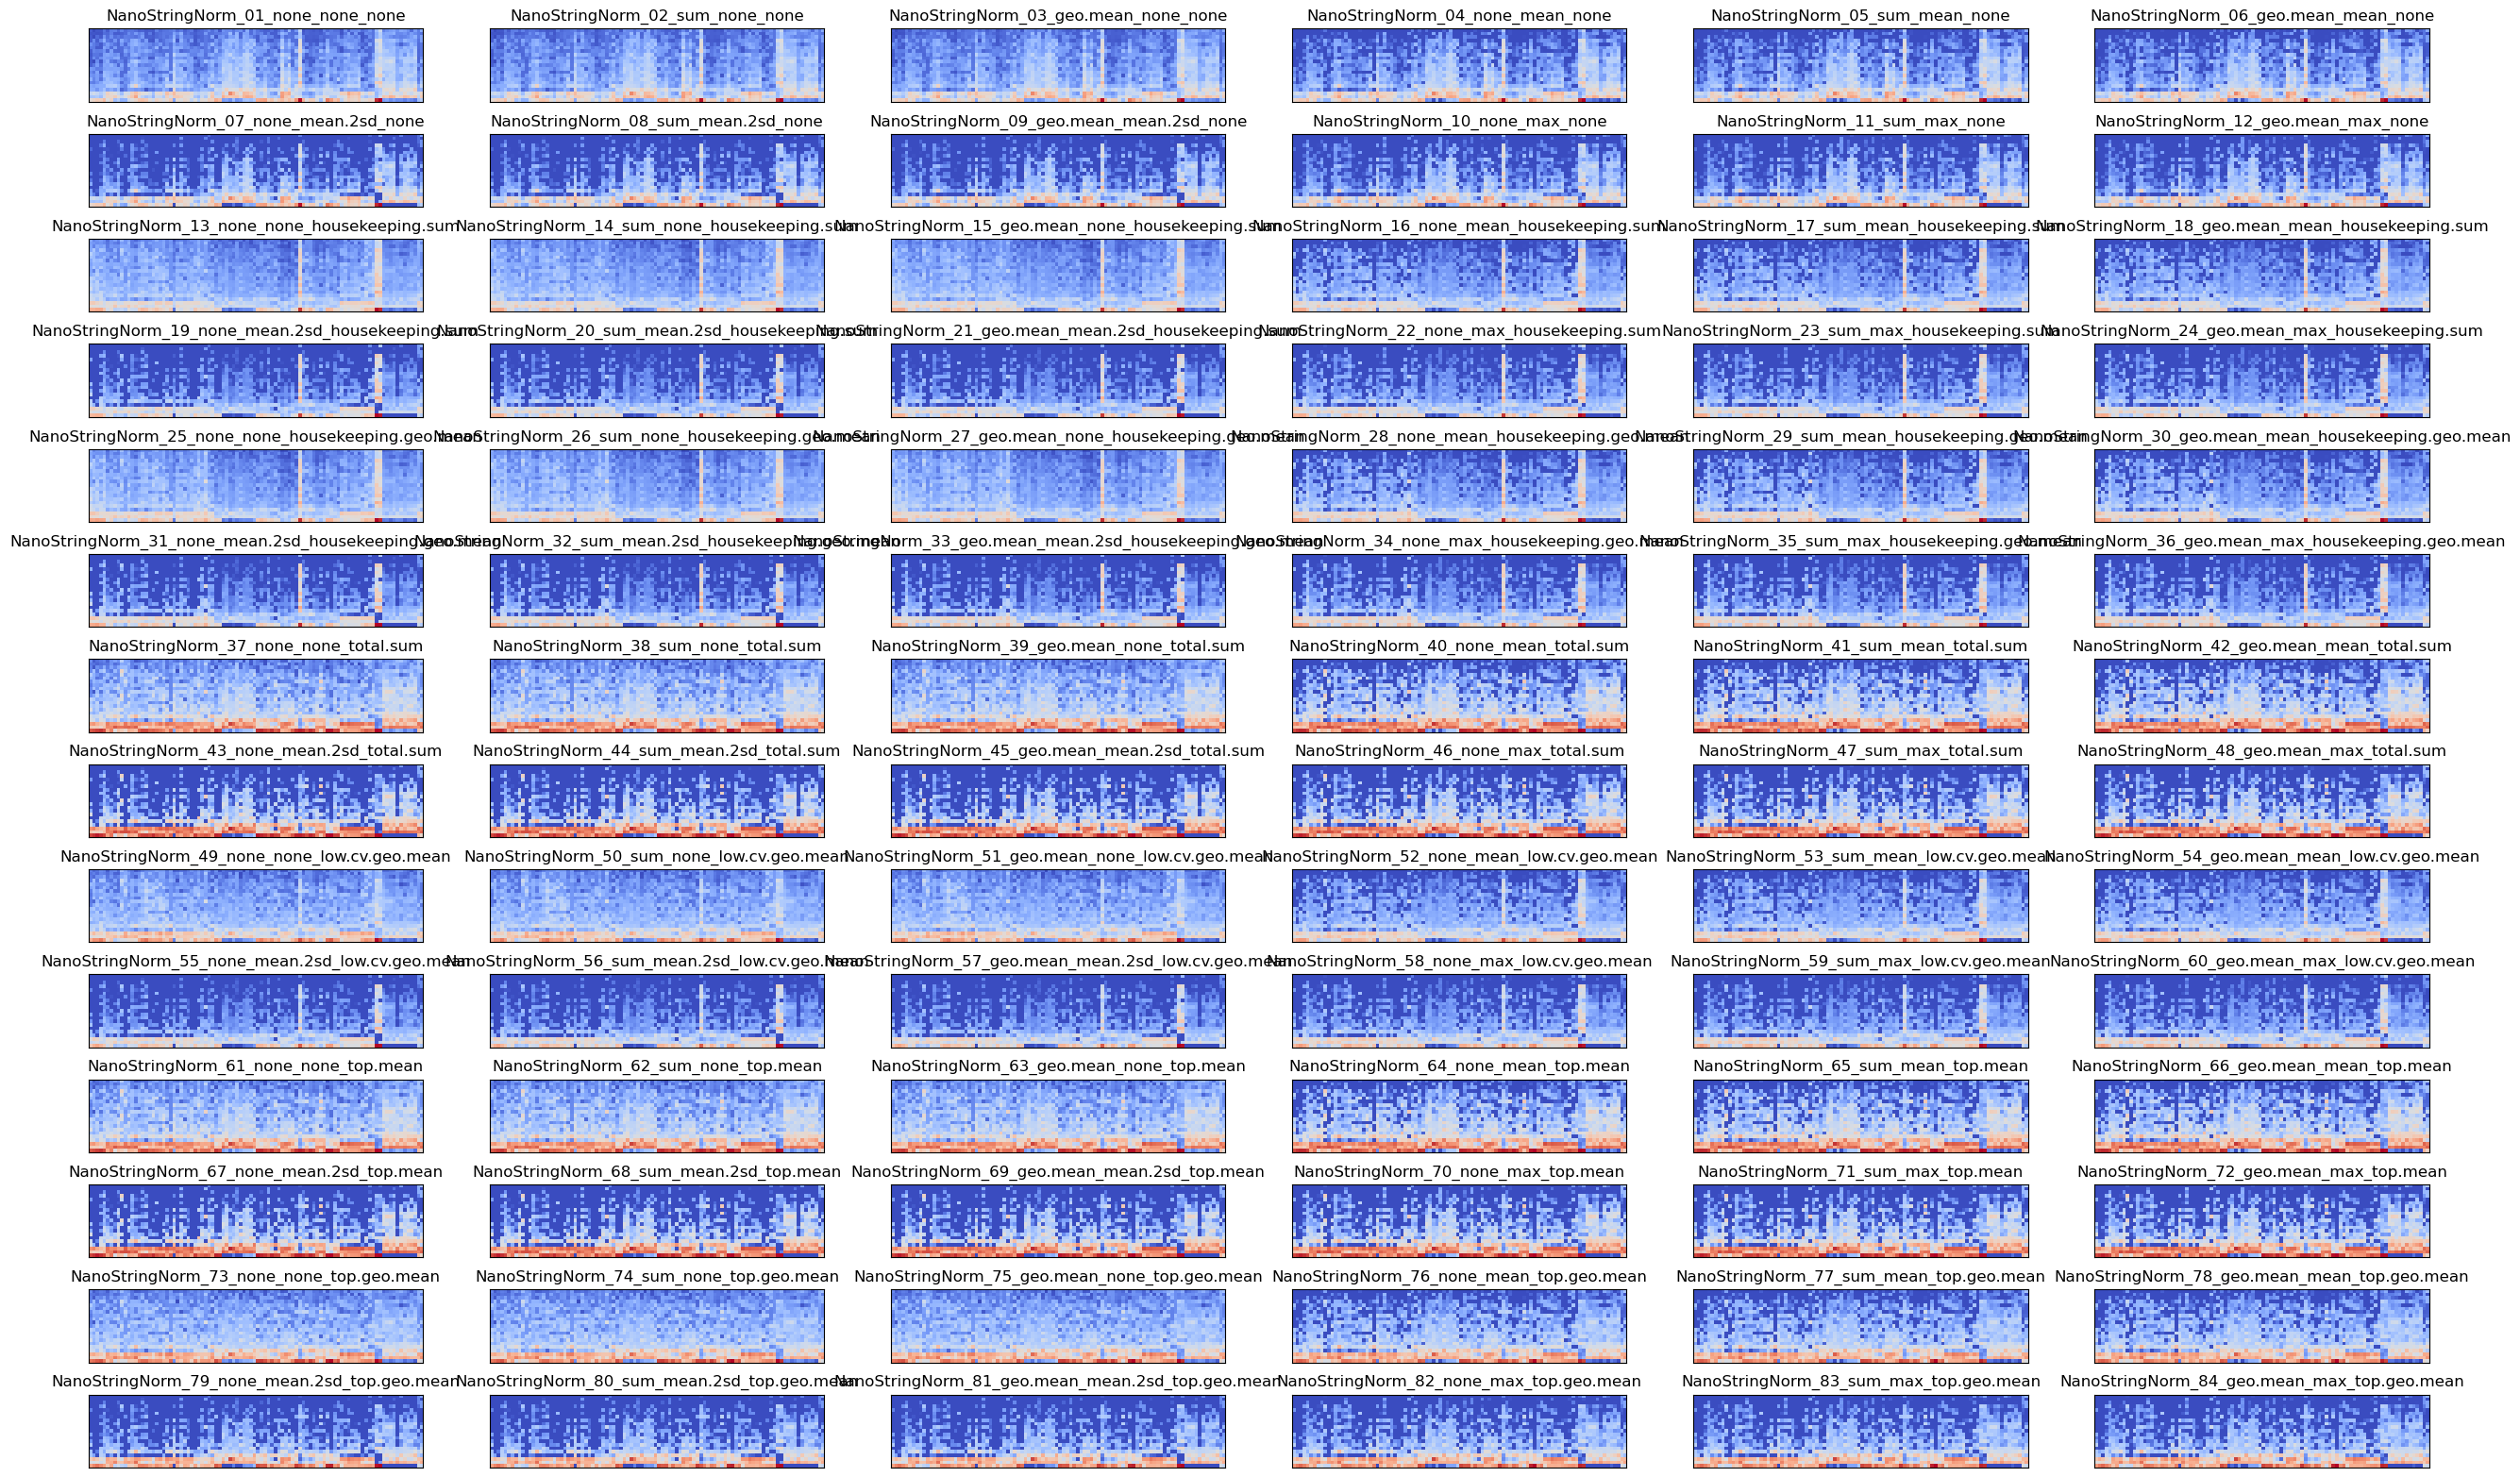

In [51]:
width = 6
height = 14


fig, axs = plt.subplots(height, width, figsize=[32,20])
# fig.suptitle('Nanostring Normalisation heatmaps')

for y in range(height):
    for x in range(width):
        fileIdx = x + y*width
        tempDF = pd.read_csv(os.path.join(normPath,files[fileIdx]), index_col=0)
#         axs[y][x].matshow(np.log2(tempDF + 1), aspect = 'auto', cmap='coolwarm')
        axs[y][x].matshow(np.log2(tempDF.loc[probeOrder,sampleOrder] + 1), cmap='coolwarm')
        axs[y][x].set_xticks([])
        axs[y][x].set_yticks([])
        axs[y][x].set_title(files[fileIdx][:-4])
    
# plt.tight_layout()
# fig.show()

In [43]:
noneMeanHKDF = pd.read_csv(os.path.join(normPath,files[27]), index_col=0)


In [44]:
temp = noneMeanHKDF > 0 

In [45]:
groupedExpressedIndex = noneMeanHKDF.loc[probeOrder].loc[((noneMeanHKDF > 0 ).sum(axis = 1) / len(noneMeanHKDF.columns) > 0.33333)].index


In [46]:
groupedExpressedIndex

Index(['CD40', 'P2ry12', 'CD39', 'Synaptophysin', 'Myelin basic protein',
       'Neurofilament light', 'Syndecan-1', 'CD68', 'CD31', 'IBA1', 'HLA-DR',
       'NeuN', 'CD11b', 'CD45', 'S100B', 'Olig2', 'TMEM119', 'Ki-67', 'GFAP',
       'MAP2', 'CD163'],
      dtype='object')

In [47]:
len(groupedExpressedIndex)

21

In [48]:
controls = list(ERCCGrouped.loc[ERCCGrouped['Code.Class'] != 'Endogenous'].index)
controls.extend(list(groupedExpressedIndex))
groupedExpressedIndex = pd.Index(controls, name='Name')
del(controls)


NameError: name 'ERCCGrouped' is not defined

In [ ]:
ERCCGrouped.loc[groupedExpressedIndex]

In [ ]:
ERCCGroupedExpressedCSV = 'ERCC_' + project + '_RUV_Grouped_Expressed.csv'

# writeOutput = True

if writeOutput:
    ERCCGrouped.loc[groupedExpressedIndex].to_csv(os.path.join(exportPath,ERCCGroupedExpressedCSV))
writeOutput= False


In [ ]:
ERCCGrouped

In [ ]:
print('run Nanostring Norm script in R with the Expressed set of genes then press enter')
input()

In [ ]:
normPath = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/RUVIII_NSNorm_Grouped_Expressed'
normPath = '../../../Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/RUVIII_NSNorm_Grouped_Expressed'

files = os.listdir(normPath)
files = sorted(files)
print(len(files))
print(files)



In [ ]:
tempDF1 = pd.read_csv(os.path.join(normPath,files[0]), index_col=0)
probeOrder = tempDF1.mean(axis=1).sort_values().index

In [ ]:
width = 6
height = 14


fig, axs = plt.subplots(height, width, figsize=[38,38])
# fig.suptitle('Nanostring Normalisation heatmaps')

for y in range(height):
    for x in range(width):
        fileIdx = x + y*width
        tempDF = pd.read_csv(os.path.join(normPath,files[fileIdx]), index_col=0)
#         axs[y][x].matshow(np.log2(tempDF + 1), aspect = 'auto', cmap='coolwarm')
        axs[y][x].matshow(np.log2(tempDF.loc[probeOrder,sampleOrder] + 1), cmap='coolwarm')
        axs[y][x].set_xticks([])
        axs[y][x].set_yticks([])
        axs[y][x].set_title(files[fileIdx][:-4])
    
# plt.tight_layout()
# fig.show()

In [ ]:
tempDF = pd.read_csv(os.path.join(normPath,files[fileIdx]), index_col=0)
axs[y][x].matshow(np.log2(tempDF.loc[probeOrder] + 1), cmap='coolwarm')


In [ ]:
# Use 49 or 52 for EdgeR analysis

In [ ]:
files[51]

In [ ]:
tempDF1

In [ ]:
tempDF1 = pd.read_csv(os.path.join(normPath,files[48]), index_col=0)
tempDF2 = pd.read_csv(os.path.join(normPath,files[51]), index_col=0)


tempDF1 = tempDF1.loc[probeOrder,sampleOrder]
tempDF2 = tempDF2.loc[probeOrder,sampleOrder]


plt.matshow(np.log2((tempDF1 - tempDF2) + 1), cmap='coolwarm')


# Run EdgeR analysis

# Convert MD Plots to Volcano Plots

In [ ]:
# Currently done in a separate notebook

# Construct dataframes simiar to desired output for HCC tables

In [ ]:
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped/HCC_vs_Normal'
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/EdgeR/Rounded_Grouped'
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped_Expressed'
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped_25'
resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped_28'
resultsFolder = '../../../Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped_28'


In [ ]:

grade1 = 'MD_plot_GroupedGrade1_GroupedNorm.csv'
grade2 = 'MD_plot_GroupedGrade2_GroupedNorm.csv'
grade3 = 'MD_plot_GroupedGrade3_GroupedNorm.csv'

outFile = 'joined_results_Grouped_Norm.csv'

In [ ]:
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped/HCC_vs_Nat_Matched'

grade1 = 'MD_plot_GroupedGrade1-1_GroupedNAT-1.csv'
grade2 = 'MD_plot_GroupedGrade2-2_GroupedNAT-2.csv'
grade3 = 'MD_plot_GroupedGrade3-3_GroupedNAT-3.csv'

outFile = 'joined_results_Grouped_NAT_Matched.csv'

In [ ]:
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped/HCC_vs_NAT'

grade1 = 'MD_plot_GroupedGrade1_GroupedNAT.csv'
grade2 = 'MD_plot_GroupedGrade2_GroupedNAT.csv'
grade3 = 'MD_plot_GroupedGrade3_GroupedNAT.csv'

outFile = 'joined_results_Grouped_NAT.csv'

In [ ]:
# resultsFolder = '/data/bak/QUT/upton6/Documents/Nanostring/projects/NS_Liver_HCC_DSP/Data_Normalisation/EdgeR_Grouped/HCC_Grade_Comps'

grade1 = 'MD_plot_GroupedGrade2_GroupedGrade1.csv'
grade2 = 'MD_plot_GroupedGrade3_GroupedGrade1.csv'
grade3 = 'MD_plot_GroupedGrade3_GroupedGrade2.csv'

outFile = 'joined_results_Grouped_Grades.csv'

In [ ]:
grade1DF = pd.read_csv(os.path.join(resultsFolder,grade1), index_col=0)
grade2DF = pd.read_csv(os.path.join(resultsFolder,grade2), index_col=0)
grade3DF = pd.read_csv(os.path.join(resultsFolder,grade3), index_col=0)

In [ ]:
grade1DF['PValue'] > 0.05

In [ ]:
g1Idx = grade1DF.loc[grade1DF['PValue'] < 0.05].index
g2Idx = grade2DF.loc[grade2DF['PValue'] < 0.05].index
g3Idx = grade3DF.loc[grade3DF['PValue'] < 0.05].index

allIdx = pd.Index(set(g1Idx) | set(g2Idx) | set(g3Idx))

In [ ]:
len(allIdx)

In [ ]:
grade1Sel = grade1DF.loc[allIdx, ['logFC', 'PValue', 'FDR']]
grade2Sel = grade2DF.loc[allIdx, ['logFC', 'PValue', 'FDR']]
grade3Sel = grade3DF.loc[allIdx, ['logFC', 'PValue', 'FDR']]



In [ ]:
joined = pd.concat([grade1Sel, grade2Sel, grade3Sel], axis=1)

In [ ]:
joined

In [ ]:
writeOutput= True

if writeOutput:
#     joined.to_csv(os.path.join(resultsFolder,'joined_results.csv'))
#     joined.to_csv(os.path.join(resultsFolder,'joined_results_Grouped_Norm.csv'))
#     joined.to_csv(os.path.join(resultsFolder,'joined_results_Grouped_NAT_Matched.csv'))
#     joined.to_csv(os.path.join(resultsFolder,'joined_results_Grouped_NAT.csv'))
    joined.to_csv(os.path.join(resultsFolder,outFile))

writeOutput = False

In [ ]:
input()
break

In [ ]:
dataPath = '../../../Nanostring/projects/Indira/DSP_Protein_Data/'




data = pd.read_csv(os.path.join(dataPath,'HK_Geo_Mean_Normalised.csv'), index_col = 0)

probeFilter = pd.read_csv(os.path.join(dataPath,'Probe_Filter.csv'), index_col = 0)

sampleInfo = pd.read_csv(os.path.join(dataPath,'Sample_Info.csv'), index_col = 0)


dataPath = '../../../Nanostring/projects/Indira/EdgeR/EdgeR_normData.tsv'
data = pd.read_csv(dataPath, index_col = 0)


dataPath = '../../../Nanostring/projects/Indira/DSP_Protein_Data/'


In [ ]:
data

In [ ]:
sampleInfo.columns

In [ ]:
wb = load_workbook(os.path.join(dataPath,'Annotation template file-1a_wells_02.xlsx'))

print(wb.sheetnames)



In [ ]:
ws = wb['Annotation template']

segments = [[y.value for y in x] for x in ws[ws.calculate_dimension()]]
df = pd.DataFrame(segments)


rowLabels = df.iloc[1:,0]
colLabels = df.iloc[0,1:]
annotations = df.iloc[1:,1:]
rowLabels += '_'
rowLabels += df.iloc[1:,1]
rowLabels += '_Full ROI'



In [ ]:
rowLabels

In [ ]:
colLabels

In [ ]:
annotations.values

In [ ]:
sampleAnnotations = pd.DataFrame(annotations.values, index=rowLabels, columns=colLabels)

# sampleAnnotations = sampleAnnotations.T
# sampleAnnotations.set_index(0, drop=True, inplace=True)
# sampleAnnotations = sampleAnnotations.T
# sampleAnnotations.set_index('Scan name', drop=True, inplace=True)
# sampleAnnotations = sampleAnnotations.T



In [ ]:
sampleAnnotations

In [ ]:
sampleAnnotations = sampleAnnotations.join(sampleInfo.T,lsuffix='Drop').T

In [ ]:
sampleAnnotations.drop(labels=[x for x in sampleAnnotations.index if x.endswith('Drop')], inplace=True)

In [ ]:
sampleInfo = sampleAnnotations

In [ ]:
sampleInfo

In [ ]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [ ]:
# Standardizing data

### I'm not sure that the transpose is what i want here. The data is the wrong shape and pc's seems to be being calculated for proteins instead of samples
X = endogNorm.transpose().values
# X = endogNorm.values
### Try to get pc's for samples
# X = endogNorm.values

## ??? With transpose makes PCA for effect of variables on smaples, without makes PCA for effects of variables on protein expression levels
###^^^ Maybe the other way round?



X_cols = endogNorm.columns
print(X_cols.shape)
y = endogNorm.index
print(y.shape)
X = standardize_data(X)
print(X.shape)


In [ ]:
# Calculating the covariance matrix

covariance_matrix = np.cov(X.T)
# covariance_matrix = np.cov(X)



print(covariance_matrix.shape)


In [ ]:
# Using np.linalg.eig function

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")
print(eigen_vectors.shape)

In [ ]:
eigenDF = pd.DataFrame(eigen_vectors, index=[endogNorm.index], columns=[endogNorm.index])
# eigenDF = pd.DataFrame(eigen_vectors, index=[endogNorm.columns], columns=[endogNorm.columns])

In [ ]:
# Calculating the explained variance on each of components


variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

In [ ]:
# Identifying components that explain at least 95%

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)


In [ ]:
cumulative_variance_explained = [np.float64(x) for x in cumulative_variance_explained]

In [ ]:
cumulative_variance_explained[0].dtype

In [ ]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic


sns.lineplot(x = [i for i in range(len(cumulative_variance_explained))], y=cumulative_variance_explained)
# plt.xlabel("Number of components")
# plt.ylabel("Cumulative explained variance")
# plt.title("Explained variance vs Number of components")



# ToDo:
# Add lines for 95% variance, and number of components describing at least 95% of variance



In [ ]:
# Using two first components (because those explain more than 95%)

projection_matrix = (eigen_vectors.T[:][:50]).T
print(projection_matrix)

In [ ]:
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' for x in X_cols]
colours = ['g' if x.split('_')[-1] == 'Tumour' else 'r' if x.split('_')[-1] == 'Immune' else 'purple' for x in X_cols]


In [ ]:
# I dont think this gives relevant info. projection matrix needs to be combined with original data to see effects of components on patients

plt.scatter([x[0] for x in projection_matrix], [x[1] for x in projection_matrix])#, c=colours)

projection_matrix.shape

In [ ]:
plt.scatter([x[2] for x in projection_matrix], [x[1] for x in projection_matrix])#, c=colours)


In [ ]:
plt.scatter([x[2] for x in projection_matrix], [x[3] for x in projection_matrix])#, c=colours)


In [ ]:
# Getting the product of original standardized X and the eigenvectors 


X_pca = X.dot(projection_matrix)
print(X_pca)

In [ ]:
X_pca.shape

In [ ]:
sampleInfo

In [ ]:
# tagDF = pd.DataFrame( data=[x.split(',') for x in sampleInfo.loc['Segment tags']], index=sampleInfo.columns, columns=['Obese','Arth','Patellar'])

In [ ]:
# tagDF

In [ ]:
# sampleInfo = pd.concat([sampleInfo,tagDF.T])

In [ ]:
sampleInfo

In [ ]:
inforSortedIndex = sampleInfo.sort_values(by=['Obese','arthritis','TMA_Core'], axis=1).columns

In [ ]:
### Add umap / tSNE analysis here